In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('./Dataset/Processed.csv') # load dataset

df.head()

,Unnamed: 0,Fever,Nasal Discharge,Loss of appetite,Weight Loss,Lameness,Breathing Difficulty,Swollen Lymph nodes,Lethargy,Depression,...,Hepatitis,Tetanus,Chronic kidney Disease,Diabetes,Gastrointestinal Disease,Allergies,Gingitivis,Cancers,Skin Rashes,Disease
0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever
1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever
2,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever
3,3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever
4,4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tick fever


In [4]:
data = df.drop(['Unnamed: 0', 'Disease'], axis=1) # drop unused columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Fever                              23999 non-null  float64
 1   Nasal Discharge                    23999 non-null  float64
 2   Loss of appetite                   23999 non-null  float64
 3   Weight Loss                        23999 non-null  float64
 4   Lameness                           23999 non-null  float64
 5   Breathing Difficulty               23999 non-null  float64
 6   Swollen Lymph nodes                23999 non-null  float64
 7   Lethargy                           23999 non-null  float64
 8   Depression                         23999 non-null  float64
 9   Coughing                           23999 non-null  float64
 10  Diarrhea                           23999 non-null  float64
 11  Seizures                           23999 non-null  flo

In [6]:
# Separate attributes and labels
X = data.drop(['Tick fever', 'Distemper', 'Parvovirus',
       'Hepatitis', 'Tetanus', 'Chronic kidney Disease', 'Diabetes',
       'Gastrointestinal Disease', 'Allergies', 'Gingitivis', 'Cancers',
       'Skin Rashes'], axis=1)

y = data[['Tick fever', 'Distemper', 'Parvovirus',
       'Hepatitis', 'Tetanus', 'Chronic kidney Disease', 'Diabetes',
       'Gastrointestinal Disease', 'Allergies', 'Gingitivis', 'Cancers',
       'Skin Rashes']]

In [49]:
y

,Tick fever,Distemper,Parvovirus,Hepatitis,Tetanus,Chronic kidney Disease,Diabetes,Gastrointestinal Disease,Allergies,Gingitivis,Cancers,Skin Rashes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# Data Splitting

# Split data to train, validation, test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split data to train + validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Show how many data in each set
print("Length of train set:", len(X_train))
print("Length of validation set:", len(X_val))
print("Length of test set:", len(X_test))

Length of train set: 14399
Length of validation set: 4800
Length of test set: 4800


In [15]:
# Defining callbacks

class myCallback(tf.keras.callbacks.Callback):
  #define the correct function signature for on_epoch_end
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.998):
      print("\nReached 99% accuracy, so cancelling training!")
    
      #stop training once the above condition is met
      self.model.stop_training = True

In [12]:
def dog_model(X_train, y_train):
    
    # Instantiate the callback class
    callbacks = myCallback()

    # Construct ANN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(86, input_shape=(86,), activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),

        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation='relu'),

        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(12, activation='softmax')
    ])

    # Model compiling
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    # Fit the model for 50 epochs adding the callbacks and save the training history
    history = model.fit(X_train,
                        y_train,
                        batch_size=600,
                        epochs=50,
                        validation_data=(X_val, y_val),
                        callbacks=[callbacks])
    
    return history

In [ ]:
model.summary() # Model summary

In [17]:
# Model training
hist = dog_model(X_train, y_train)

c:\Users\PRITHWISH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.1700 - loss: 2.4523 - val_accuracy: 0.4746 - val_loss: 2.2964
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.4361 - loss: 2.2450 - val_accuracy: 0.8138 - val_loss: 1.8285
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7300 - loss: 1.7361 - val_accuracy: 0.9588 - val_loss: 1.0067
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9007 - loss: 0.9527 - val_accuracy: 0.9850 - val_loss: 0.3318
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.9557 - loss: 0.3878 - val_accuracy: 0.9929 - val_loss: 0.1139
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9743 - loss: 0.1773 - val_accuracy: 0.9944 - val_loss: 0.0576
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9851 - loss: 0.1026 - val_accuracy: 0.9960 - val_loss: 0.0357
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9879 - loss: 0.0729 - val_accuracy: 0.9969 

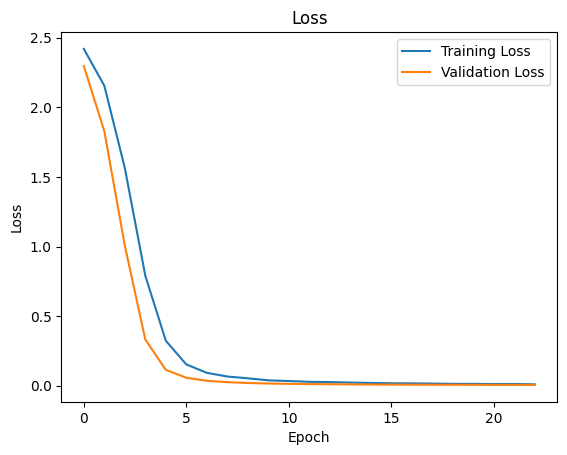

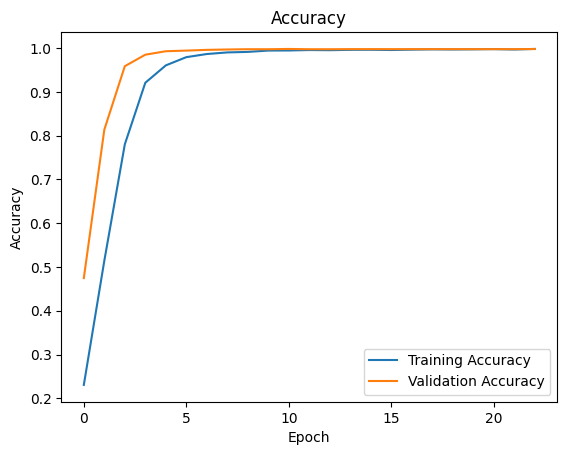

In [19]:
# Obtain training history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Draw loss plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Draw accuracy plot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [33]:
X_test

,Fever,Nasal Discharge,Loss of appetite,Weight Loss,Lameness,Breathing Difficulty,Swollen Lymph nodes,Lethargy,Depression,Coughing,...,Lack of energy,Smelly,Neurological Disorders,Eye Discharge,Loss of Consciousness,Enlarged Liver,lethargy,Purging,Bloody discharge,Wounds
3111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20799,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21838,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2754,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Model prediction

y_pred = hist.model.predict(X_test)

print(y_pred)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[2.2248330e-06 9.9999094e-01 2.6617317e-07 ... 1.5307264e-06
  3.2232105e-08 7.0113794e-07]
 [4.8197277e-09 6.4388587e-07 2.9752783e-07 ... 9.9999857e-01
  1.6610887e-08 5.8648475e-08]
 [3.6175307e-09 7.1365932e-08 6.6466650e-06 ... 8.4319609e-06
  8.6694104e-07 1.2254592e-06]
 ...
 [2.0173295e-06 9.9999642e-01 6.9497084e-08 ... 5.2496512e-07
  3.3959896e-08 1.1618688e-07]
 [1.2653552e-06 9.9999762e-01 7.3963122e-08 ... 1.9310974e-07
  1.5063789e-09 6.7030101e-08]
 [1.9127422e-06 1.5649587e-09 1.0211976e-05 ... 4.9631285e-07
  1.1139113e-07 1.9433379e-08]]


# Model Evaluation

In [23]:
y_pred_classes = np.argmax(y_pred, axis=1) # return class prediction with the highest probability

In [40]:
y_pred_classes

array([1, 9, 8, ..., 1, 1, 6], dtype=int64)

In [52]:
disease=['Tick fever', 'Distemper', 'Parvovirus',
       'Hepatitis', 'Tetanus', 'Chronic kidney Disease', 'Diabetes',
       'Gastrointestinal Disease', 'Allergies', 'Gingitivis', 'Cancers',
       'Skin Rashes']

In [53]:
disease[y_pred_classes[0]]

'Distemper'

In [24]:
# convert y_test format from data frame to numpy
y_test_nump = y_test.to_numpy()
y_test_nump

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# convert y_pred_classes to One Hot Encoding, because in order to calculating f1_score, recall, and precision
# y_test and y_pred_classes should be in the same format (either one hot encoding or label encoding)
y_pred_ohe = keras.utils.to_categorical(y_pred_classes)

In [26]:
# precision, recall, and f1-score in each classes
print(classification_report(y_true=y_test_nump, y_pred=y_pred_ohe))
print('F1-score% =', f1_score(y_test_nump, y_pred_ohe, average='weighted')*100, '|',
      'Accuracy% =', accuracy_score(y_test_nump, y_pred_ohe)*100,
      'Recall% =', recall_score(y_test_nump, y_pred_ohe, average='weighted')*100, '|',
      'Precision% =', precision_score(y_test_nump, y_pred_ohe, average='weighted')*100)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       365
           1       1.00      1.00      1.00       447
           2       1.00      1.00      1.00       398
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       396
           5       1.00      1.00      1.00       400
           6       1.00      1.00      1.00       406
           7       1.00      1.00      1.00       382
           8       1.00      1.00      1.00       412
           9       1.00      1.00      1.00       407
          10       1.00      0.98      0.99       392
          11       1.00      1.00      1.00       410

   micro avg       1.00      1.00      1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800
 samples avg       1.00      1.00      1.00      4800

F1-score% = 99.83356692456795 | Accuracy% = 99.83333333333333 Recall% = 99.8333

F1-score% = 99.83356692456795 | Accuracy% = 99.83333333333333 | Recall% = 99.83333333333333 | Precision% = 99.83690795352993


<Axes: >

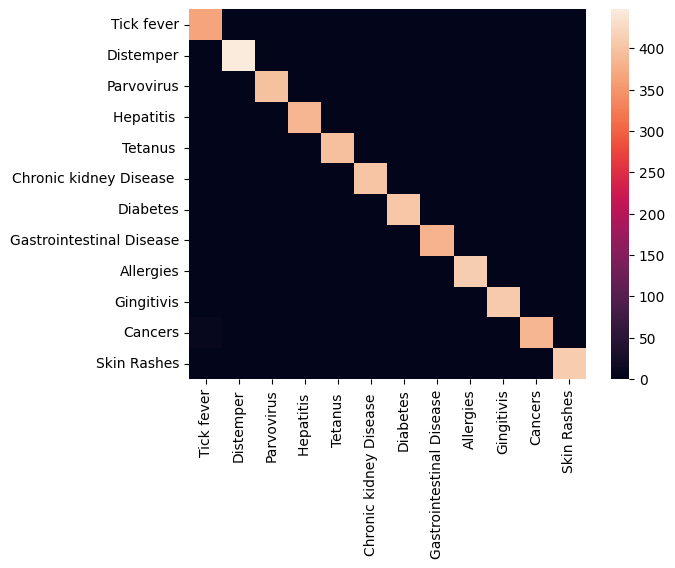

In [27]:
conf_mat = confusion_matrix(y_test_nump.argmax(axis=1), y_pred_ohe.argmax(axis=1))
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test_nump, y_pred_ohe, average='weighted')*100, '|',
      'Accuracy% =', accuracy_score(y_test_nump, y_pred_ohe)*100, '|',
      'Recall% =', recall_score(y_test_nump, y_pred_ohe, average='weighted')*100, '|',
      'Precision% =', precision_score(y_test_nump, y_pred_ohe, average='weighted')*100
      )
sns.heatmap(df_cm)

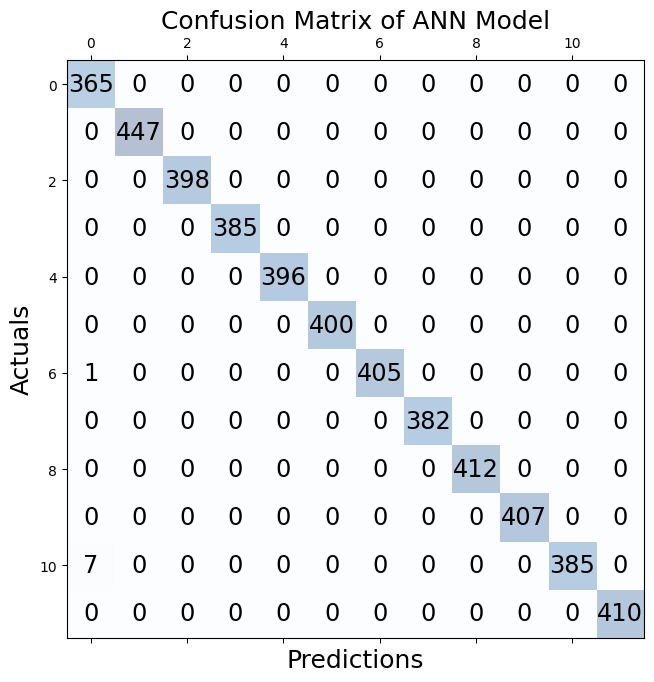

In [28]:
conf_matrix = metrics.confusion_matrix(y_test_nump.argmax(axis=1), y_pred_ohe.argmax(axis=1))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of ANN Model', fontsize=18)
plt.show()

In [30]:
# Save Model in .h5 format

from keras.models import save_model

hist.model.save('Dog_Symptoms_Model.h5')